In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

In [2]:
df= pd.read_csv(R"C:\Users\vaish\Downloads\voice.csv")
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [3]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [4]:
df.shape

(3168, 21)

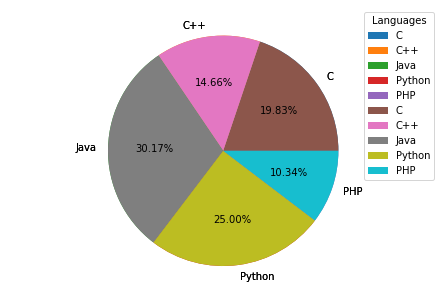

In [12]:
from matplotlib import pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = ['C', 'C++', 'Java', 'Python', 'PHP']
students = [23,17,35,29,12]
ax.pie(students, labels = langs,autopct='%1.2f%%')
plt.pie(students, labels = langs)
plt.legend(title = "Languages")
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
print(x.shape)
print(y.shape)

(3168, 20)
(3168,)


In [15]:
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.20)
print(x_tr.shape)
print(x_te.shape)
print(y_tr.shape)
print(x_te.shape)

(2534, 20)
(634, 20)
(2534,)
(634, 20)


## Decision Tree Classifier

In [18]:
m1=DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_split=10)
m1.fit(x_tr,y_tr)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=10)

In [19]:
print('Training score',m1.score(x_tr,y_tr))
print('Testing score',m1.score(x_te,y_te))

Training score 0.968034727703236
Testing score 0.9574132492113565


In [20]:
ypred_m1=m1.predict(x_te)
print(ypred_m1)

['male' 'female' 'male' 'female' 'female' 'male' 'female' 'female'
 'female' 'male' 'female' 'male' 'male' 'female' 'male' 'male' 'female'
 'male' 'female' 'female' 'male' 'male' 'male' 'female' 'male' 'male'
 'female' 'male' 'female' 'female' 'male' 'female' 'male' 'male' 'female'
 'male' 'male' 'female' 'female' 'female' 'male' 'male' 'male' 'female'
 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'female'
 'female' 'male' 'male' 'female' 'female' 'female' 'male' 'female'
 'female' 'male' 'female' 'male' 'female' 'male' 'female' 'male' 'male'
 'male' 'male' 'female' 'male' 'female' 'female' 'male' 'male' 'female'
 'female' 'male' 'female' 'female' 'female' 'male' 'female' 'female'
 'female' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'male'
 'female' 'male' 'male' 'female' 'male' 'male' 'male' 'female' 'female'
 'female' 'female' 'male' 'male' 'male' 'male' 'female' 'female' 'male'
 'male' 'female' 'female' 'male' 'male' 'female' 'male' 'male' 'female'
 'm

In [21]:
print(confusion_matrix(y_te,ypred_m1))
print(classification_report(y_te,ypred_m1))

[[294   9]
 [ 18 313]]
              precision    recall  f1-score   support

      female       0.94      0.97      0.96       303
        male       0.97      0.95      0.96       331

    accuracy                           0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634



In [23]:
fn=x_tr.columns
cn=['0','1']
print(fn)
print(cn)

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx'],
      dtype='object')
['0', '1']


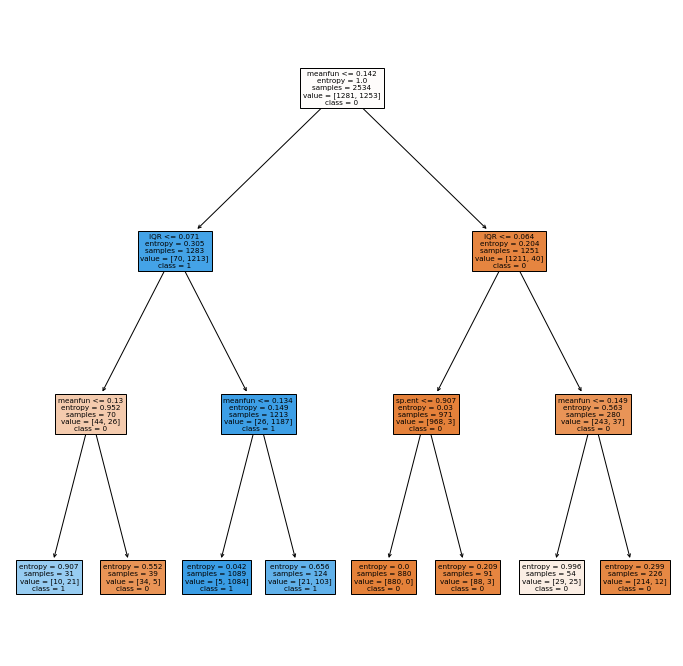

In [24]:
plt.figure(figsize=(12,12))
tree.plot_tree(m1,feature_names=fn,class_names=cn,filled=True)
plt.show()

## Random Forest Classifier

In [25]:
m2=RandomForestClassifier(n_estimators=50,criterion='gini',max_depth=5,min_samples_split=10)
m2.fit(x_tr,y_tr)

RandomForestClassifier(max_depth=5, min_samples_split=10, n_estimators=50)

In [27]:
print('Training score',m2.score(x_tr,y_tr))
print('Testing score',m2.score(x_te,y_te))

Training score 0.9818468823993686
Testing score 0.9763406940063092


In [28]:
ypred_m2=m2.predict(x_te)
print(ypred_m2)

['male' 'female' 'male' 'female' 'female' 'male' 'female' 'female'
 'female' 'male' 'female' 'male' 'male' 'female' 'male' 'male' 'female'
 'male' 'female' 'female' 'male' 'male' 'male' 'female' 'male' 'male'
 'female' 'male' 'female' 'female' 'male' 'female' 'male' 'male' 'female'
 'male' 'male' 'female' 'female' 'female' 'male' 'male' 'male' 'female'
 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'female'
 'female' 'male' 'male' 'female' 'female' 'female' 'male' 'female' 'male'
 'male' 'female' 'male' 'female' 'male' 'female' 'male' 'male' 'male'
 'male' 'female' 'male' 'female' 'female' 'male' 'male' 'female' 'female'
 'male' 'female' 'female' 'female' 'male' 'female' 'female' 'female'
 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'female'
 'male' 'male' 'female' 'male' 'male' 'male' 'female' 'female' 'female'
 'female' 'male' 'male' 'male' 'male' 'female' 'female' 'male' 'male'
 'female' 'female' 'male' 'male' 'female' 'male' 'male' 'female' 'male

In [29]:
print(confusion_matrix(y_te,ypred_m2))
print(classification_report(y_te,ypred_m2))

[[295   8]
 [  7 324]]
              precision    recall  f1-score   support

      female       0.98      0.97      0.98       303
        male       0.98      0.98      0.98       331

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



In [30]:
from sklearn import tree

In [31]:
fn=x_tr.columns
cn=['0','1']
print(fn)
print(cn)

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx'],
      dtype='object')
['0', '1']


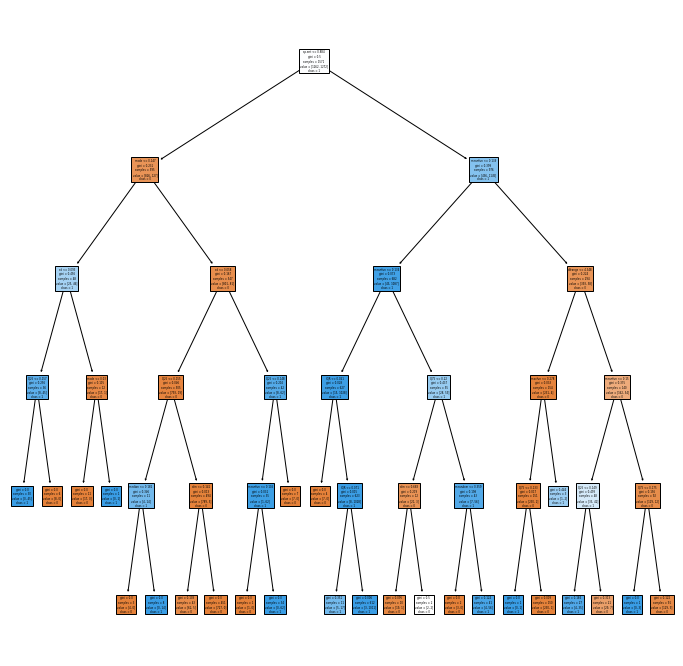

In [32]:
plt.figure(figsize=(12,12))
tree.plot_tree(m2.estimators_[0],feature_names=fn,class_names=cn,filled=True)
plt.show()

## KNN Classifier

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
m3=KNeighborsClassifier(n_neighbors=17)
m3.fit(x_tr,y_tr)

KNeighborsClassifier(n_neighbors=17)

In [35]:
print('Training score',m3.score(x_tr,y_tr))
print('Testing score',m3.score(x_te,y_te))

Training score 0.7434885556432518
Testing score 0.6782334384858044


In [37]:
ypred_m3=m3.predict(x_te)
print(ypred_m3)

['female' 'male' 'male' 'female' 'male' 'male' 'female' 'male' 'male'
 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'female' 'male' 'male'
 'female' 'female' 'female' 'female' 'female' 'male' 'male' 'female'
 'male' 'female' 'female' 'male' 'male' 'male' 'female' 'male' 'male'
 'male' 'female' 'female' 'male' 'male' 'male' 'female' 'female' 'male'
 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'female' 'female'
 'female' 'male' 'male' 'female' 'female' 'female' 'male' 'female' 'male'
 'male' 'female' 'male' 'male' 'male' 'female' 'male' 'female' 'male'
 'male' 'female' 'female' 'male' 'male' 'male' 'male' 'female' 'female'
 'male' 'female' 'male' 'male' 'male' 'male' 'female' 'male' 'male' 'male'
 'female' 'male' 'male' 'male' 'male' 'female' 'female' 'female' 'male'
 'male' 'male' 'female' 'male' 'female' 'female' 'female' 'female'
 'female' 'female' 'male' 'male' 'female' 'male' 'female' 'male' 'female'
 'female' 'female' 'male' 'female' 'female' 'male' 'male' 'female'
 'femal

In [38]:
print(confusion_matrix(y_te,ypred_m3))
print(classification_report(y_te,ypred_m3))

[[194 109]
 [ 95 236]]
              precision    recall  f1-score   support

      female       0.67      0.64      0.66       303
        male       0.68      0.71      0.70       331

    accuracy                           0.68       634
   macro avg       0.68      0.68      0.68       634
weighted avg       0.68      0.68      0.68       634



## Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
m4 = LogisticRegression(solver='liblinear')
m4.fit(x_tr,y_tr)

LogisticRegression(solver='liblinear')

In [42]:
print('Training score',m4.score(x_tr,y_tr))
print('Testing score',m4.score(x_te,y_te))

Training score 0.9084451460142068
Testing score 0.889589905362776


In [43]:
ypred_m4 = m4.predict(x_te)
print(ypred_m4)

['male' 'female' 'male' 'female' 'female' 'male' 'female' 'female' 'male'
 'male' 'female' 'male' 'male' 'female' 'male' 'male' 'female' 'male'
 'female' 'female' 'male' 'male' 'male' 'female' 'male' 'male' 'female'
 'male' 'female' 'female' 'male' 'female' 'male' 'male' 'female' 'male'
 'male' 'female' 'female' 'female' 'male' 'male' 'male' 'female' 'female'
 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'female' 'female'
 'male' 'male' 'female' 'female' 'female' 'male' 'male' 'male' 'male'
 'female' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'female'
 'male' 'female' 'female' 'male' 'male' 'female' 'male' 'male' 'female'
 'male' 'female' 'male' 'female' 'female' 'female' 'male' 'male' 'male'
 'male' 'male' 'male' 'male' 'male' 'male' 'female' 'female' 'male' 'male'
 'male' 'male' 'female' 'female' 'female' 'female' 'female' 'male' 'male'
 'male' 'male' 'female' 'female' 'male' 'male' 'female' 'female' 'male'
 'male' 'female' 'male' 'male' 'female' 'male' 'femal

In [45]:
print(confusion_matrix(y_te,ypred_m4))
print(classification_report(y_te,ypred_m4))

[[253  50]
 [ 20 311]]
              precision    recall  f1-score   support

      female       0.93      0.83      0.88       303
        male       0.86      0.94      0.90       331

    accuracy                           0.89       634
   macro avg       0.89      0.89      0.89       634
weighted avg       0.89      0.89      0.89       634



## SVM Classifier

In [46]:
from sklearn.svm import SVC

In [47]:
m5 = SVC(kernel='linear',C=1)
m5.fit(x_tr,y_tr)

SVC(C=1, kernel='linear')

In [48]:
print('Training score',m5.score(x_tr,y_tr))
print('Testing score',m5.score(x_te,y_te))

Training score 0.9226519337016574
Testing score 0.9148264984227129


In [49]:
ypred_m5 = m5.predict(x_te)
print(ypred_m5)

['male' 'female' 'male' 'female' 'female' 'male' 'female' 'female'
 'female' 'male' 'female' 'male' 'male' 'male' 'male' 'male' 'female'
 'male' 'female' 'female' 'male' 'male' 'male' 'female' 'male' 'male'
 'female' 'male' 'female' 'female' 'male' 'female' 'male' 'male' 'female'
 'male' 'male' 'female' 'female' 'female' 'male' 'male' 'male' 'female'
 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'female'
 'female' 'male' 'male' 'female' 'female' 'female' 'male' 'female' 'male'
 'male' 'female' 'male' 'male' 'male' 'female' 'male' 'male' 'male' 'male'
 'female' 'male' 'female' 'female' 'male' 'male' 'female' 'male' 'male'
 'female' 'female' 'female' 'male' 'female' 'female' 'female' 'male'
 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'female' 'male'
 'male' 'male' 'male' 'male' 'male' 'female' 'female' 'female' 'female'
 'male' 'male' 'male' 'male' 'female' 'female' 'male' 'male' 'female'
 'female' 'male' 'male' 'female' 'male' 'male' 'female' 'male' 'male'

In [50]:
print(confusion_matrix(y_te,ypred_m5))
print(classification_report(y_te,ypred_m5))

[[258  45]
 [  9 322]]
              precision    recall  f1-score   support

      female       0.97      0.85      0.91       303
        male       0.88      0.97      0.92       331

    accuracy                           0.91       634
   macro avg       0.92      0.91      0.91       634
weighted avg       0.92      0.91      0.91       634



In [52]:
print('DTC Accuracy',accuracy_score(y_te,ypred_m1))
print('RFC Accuracy',accuracy_score(y_te,ypred_m2))
print('KNN Accuracy',accuracy_score(y_te,ypred_m3))
print('LogReg Accuracy',accuracy_score(y_te,ypred_m4))
print('SVM Accuracy',accuracy_score(y_te,ypred_m5))

DTC Accuracy 0.9574132492113565
RFC Accuracy 0.9763406940063092
KNN Accuracy 0.6782334384858044
LogReg Accuracy 0.889589905362776
SVM Accuracy 0.9148264984227129


# Considering the above results, we can conclude that Random Forest Classifier Model reports the greatest accuracy of 97%. 